## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rivian_df = pd.read_csv('CSVs/rivian_df.csv')

### Visualizing Sentiment versus Returns

In [3]:
sns.set_theme(style = 'whitegrid')

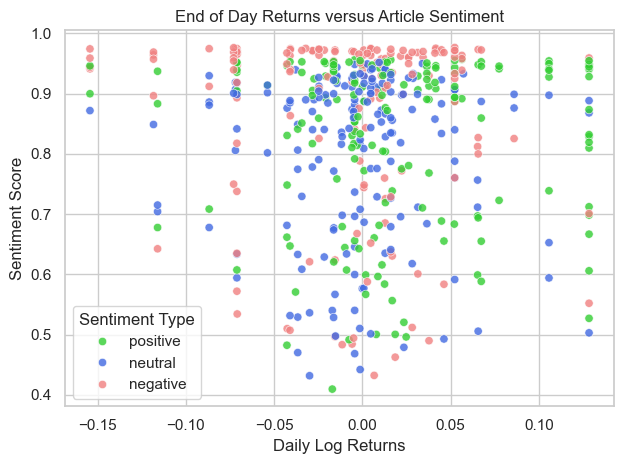

In [4]:
from matplotlib.ticker import FuncFormatter

sent_palette = {
    'positive': 'limegreen',
    'negative': 'lightcoral',
    'neutral': 'royalblue'
}

sns.scatterplot(rivian_df, x = 'Returns', y = 'sent_score', hue = 'sent_label', alpha = .8, palette = sent_palette)
plt.xlabel('Daily Log Returns')
plt.ylabel('Sentiment Score')
plt.title('End of Day Returns versus Article Sentiment')
plt.legend(title='Sentiment Type')
plt.tight_layout()

### Exploring Positive versus Negative Return by Sentiment Type

In [38]:
rivian_df['sign'] = [1 if ret > 0 else 0 for ret in rivian_df['Returns']]

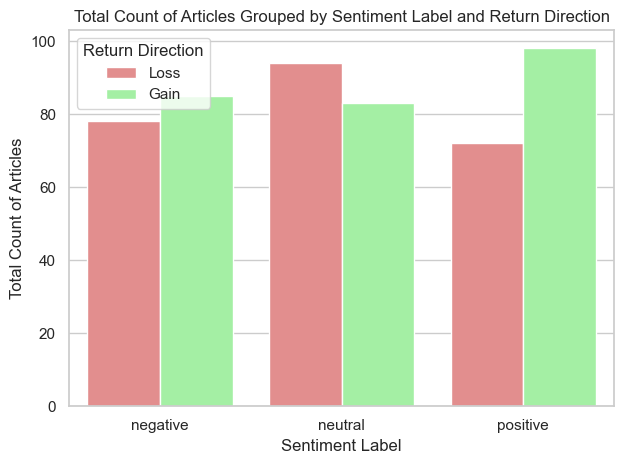

In [55]:
count = rivian_df.groupby(['sent_label', 'sign']).size().reset_index(name='count')

palette = {
    0: 'lightcoral',
    1: 'palegreen'
}

sns.barplot(count, x = 'sent_label', y = 'count', hue = 'sign', palette = palette)
plt.xlabel('Sentiment Label')
plt.ylabel('Total Count of Articles')
plt.title('Total Count of Articles Grouped by Sentiment Label and Return Direction')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles = handles, labels = ['Loss', 'Gain'], title = 'Return Direction', loc = 'upper left')
plt.tight_layout()
plt.show()




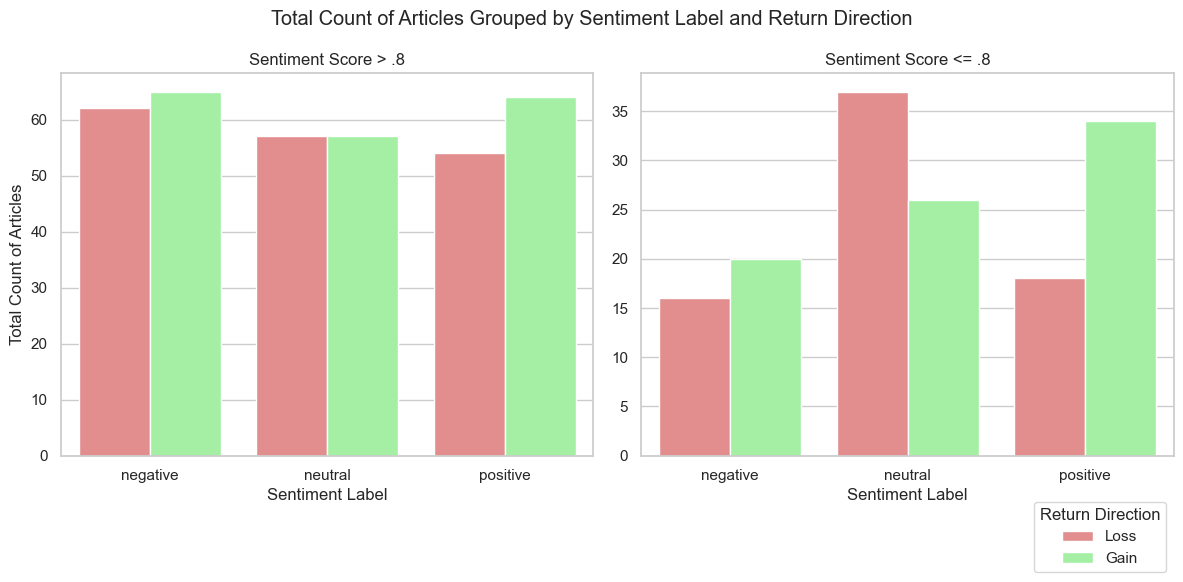

In [94]:
high_score = rivian_df[rivian_df['sent_score'] > .8]
normal_score = rivian_df[rivian_df['sent_score'] <= .8]



count_high = high_score.groupby(['sent_label', 'sign']).size().reset_index(name='count')
count_normal = normal_score.groupby(['sent_label', 'sign']).size().reset_index(name='count')


palette = {
    0: 'lightcoral',
    1: 'palegreen'
}

fig, ax = plt.subplots(1, 2, figsize = (12, 6))

sns.barplot(count_high, x = 'sent_label', y = 'count', hue = 'sign', palette = palette, ax=ax[0])
ax[0].get_legend().remove()
ax[0].set_title('Sentiment Score > .8')
ax[0].set_xlabel('Sentiment Label')
ax[0].set_ylabel('Total Count of Articles')


sns.barplot(count_normal, x = 'sent_label', y = 'count', hue = 'sign', palette = palette, ax=ax[1])
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles = handles, labels = ['Loss', 'Gain'], title = 'Return Direction', bbox_to_anchor = (1, -.1))
ax[1].set_title('Sentiment Score <= .8')
ax[1].set_xlabel('Sentiment Label')
ax[1].set_ylabel('')

fig.suptitle('Total Count of Articles Grouped by Sentiment Label and Return Direction')
fig.tight_layout()
